Ομάδα 88

Ναταλία-Μαρία Γρηγοριάδου 03118940

Νικόλαος Τασιόπουλος 03118858 

ΘΕΩΡΗΤΙΚΟ ΜΕΡΟΣ:

α) Στην απεικόνιση μίας εικόνας η τιμή του κάθε pixel δεν είναι τυχαία. Παρατηρούμε ότι υπάρχει συσχέτιση με τα γειτονικά πίξελ. Αυτό σημαίνει ότι ένα μεγάλο κομμάτι της πληροφορίας της εικόνας είναι επαναλαμβανόμενο άρα και περιττό καθιστώντας την κωδικοποίηση της εικόνας μη αποδοτική. Το πρόβλημα που θίγει το άρθρο αφορά το πως μπορούμε να μειώσουμε την κωδικοποιημένη αναπαράσταση της εικόνας (με δυνατότητα ανακατασκευής της αρχικής), προβλέποντας την τιμή των πίξελ με βάση τα γειτονικά τους. Στο άρθρο εισάγεται ένας νέος τρόπος κωδικοποιήσης της εικόνας, ο οποίος αξιοποιεί τα πλεονεκτήματα των προγενέστερών του μεθόδων (predictive and transform), αυτός της Laplacian πυραμίδας. Τα επίπεδα της Laplacian πυραμίδας βασίζονται στα επίπεδα της Gaussian πυραμίδας (τα οποία μπορούμε να δούμε ως το αποτέλεσμα της εφαρμογής ενός βαθυπερατού φίλτρου στο προηγούμενο επίπεδο), κωδικοποιώντας όμως το σφάλμα μεταξύ των διαδοχικών επιπέδων (το οποίο μπορούμε να δούμε ως το αποτέλεσμα της εφαρμογής ενός ζωνοπερατού φίλτρου στο προηγούμενο επίπεδο).

β) Τα επίπεδα της Gaussian πυραμίδας σχηματίζονται εφαρμόζοντας επαναληπτικά συνέλιξη στην εικόνα με μια συνάρτηση βάρους που προσομοιάζει την Gaussian πιθανοτική κατανομή.
To Gaussian filter ουσιαστικά χρησιμοποιείται για να πάρουμε πληροφορία απο όλα τα γειτονικά πιξελ και η υποδειγματοληψία χρησιμοποιείται για να παραλείψουμε μερικά γειτονικά με σκοπό την μείωση της επαναλαμβανόμενης πληροφορίας.

γ) Ο στόχος μας είναι η κωδικοποίηση της εικόνας χωρίς επανάληψη περιττής πληροφορίας. Και στις δύο πυραμίδες αυτό επιτυγχάνεται. στην Laplacian, όμως κωδικοποιούμε το σφάλμα μεταξύ των δύο επιπέδων της Gaussian πυραμίδας. Αυτό έχει ως αποτέλεσμα να μειώνεται η συσχέτιση μεταξύ των πίξελ. Οι κωδικοποιημένες τιμές είναι πολύ μικρές (κοντά στο 0) μειώνοντας έτσι σημαντικά την εντροπία.

Μέσω της λαπλασιανής κωδικοποιούμε και το error image ως την διαφορά των επιπέδων gi-expand(gi+1) (για αυτο ειναι καλυτερη απο την gaussian)

δ)
Με δοσμένη την λαπλασιανή πυραμίδα για να ανακατασκευάσουμε τέλεια την αρχική εικόνα μπορουμε να κάνουμε expand όλα τα επίπεδα της πυραμίδας και να τα φέρουμε στο αρχικό μέγεθος (της εικόνας στην βάση της πυραμίδας) και να προσθέσουμε τις νεες εικονες ή πιο αποτελεσματικά, ξεκινώντας απο την κορυφή της πυραμίδας, κάνουμε εξπαντ και προσθέτουμε στο αμέσως επόμενο επίπεδο. σε αυτο που θα προκύψει ξανα κάνουμε εξπαντ και προσθέτουμε στο επόμενο επίπεδο και επαναλαμβάνουμε μέχρι να ανακτηθεί η εικόνα. (Υπάρχουν διαφορές με την αρχική εικόνα αλλα δεν ειναι αντιληπτες απο το ανθρώπινο μάτι.)

In [91]:
import numpy as np
import urllib
import cv2
from matplotlib import pyplot as plt
from skimage import data as skdata

In [92]:
# Εργαστηριακό μέρος 
# a)
def Gkernel(a):
    c= 1/4-a
    b=1/4
    arr = np.array([[c], [b], [a], [b], [c]])
    return arr@arr.T #multiply arrays and return the result

h = Gkernel(1/4)
print(h)

[[0.     0.     0.     0.     0.    ]
 [0.     0.0625 0.0625 0.0625 0.    ]
 [0.     0.0625 0.0625 0.0625 0.    ]
 [0.     0.0625 0.0625 0.0625 0.    ]
 [0.     0.     0.     0.     0.    ]]


In [93]:
# b)

def Greduce(I,h):
    # downsample the image by 2 and return the result
    return cv2.filter2D(I,-1,h)[0::2, 0::2]

In [94]:
# c)
def GaussianPyramid(I,a, levels):
    # build a Gaussian pyramid on I and return the result
    h=Gkernel(a)
    G = [I]
    for i in range(levels):
        G.append(Greduce(G[i],h))
    return G



In [95]:
# d)
def GaussianExpand(I,h):
    expanded_image = cv2.resize(I, (I.shape[0]*2, I.shape[1]*2), interpolation=cv2.INTER_AREA)
    return cv2.filter2D(expanded_image, -1, h)


In [96]:
# e)

def LaplassianPyramid(I,a, levels):
    # build a Laplassian pyramid on I and return the result
    h=Gkernel(a)
    (G) = GaussianPyramid(I,a,levels)
    L=[G[levels-1]]
    for n in range(levels-1):
        interpolation = GaussianExpand(G[levels-n-1],h)
        difference = G[levels-n-2] - interpolation + 128
        L.append(difference)
    L.reverse()
    return L

In [97]:
# f)
def LaplassianReconstruct(L,a, levels):
    # reconstruct the image from its Laplassian pyramid and return the result
    h=Gkernel(a)
    for i in range(levels-1):
        L[i] = GaussianExpand(L[i],h) + L[i+1]
    return L[0]

In [98]:
# g)

def LaplassianQuantize(L,a, levels):
    # quantize the Laplassian pyramid and return the result
    h=Gkernel(a)
    for i in range(levels-1):
        L[i] = GaussianExpand(L[i],h) + L[i+1]
    return L[0]

In [99]:
# Δοκιμές Αλγορίθμου

# α)
#load Lena
Lena_HTTP = urllib.request.urlopen('http://www.image.ntua.gr/~tpar/LABimage/lena.png')
Lena_arr = np.asanyarray(bytearray(Lena_HTTP.read()), dtype=np.uint8)
Lena_BGR = cv2.imdecode(Lena_arr,-1)
Lena_RGB = cv2.cvtColor(Lena_BGR, cv2.COLOR_BGR2RGB)


#load Camera
Camera = skdata.camera()
Camera_RGB = cv2.cvtColor(Camera, cv2.COLOR_BGR2RGB)
Camera_BGR = cv2.cvtColor(Camera_RGB, cv2.COLOR_RGB2BGR)



In [100]:
def show_Laplassian_image(image_list):
    for i in range(depth):
        plt.figure(figsize=(10,10))
        plt.imshow(image_list[i])
        plt.title("Laplassian Image level "+str(i))
        plt.show()

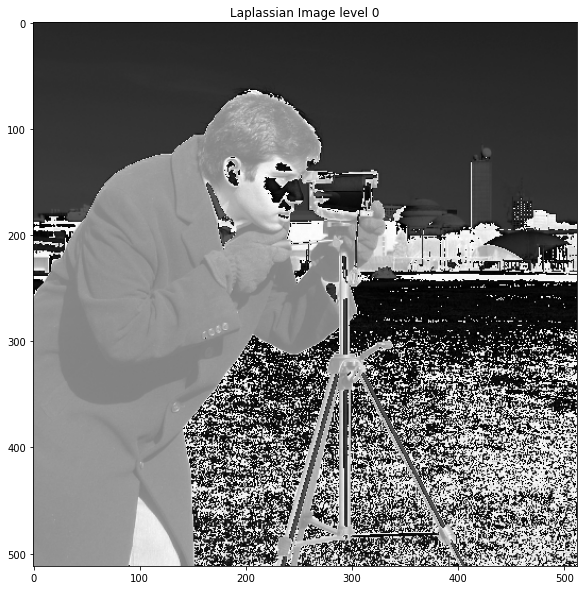

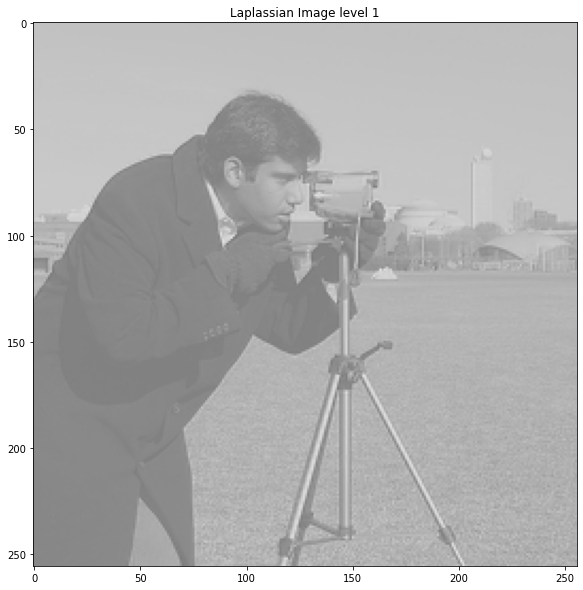

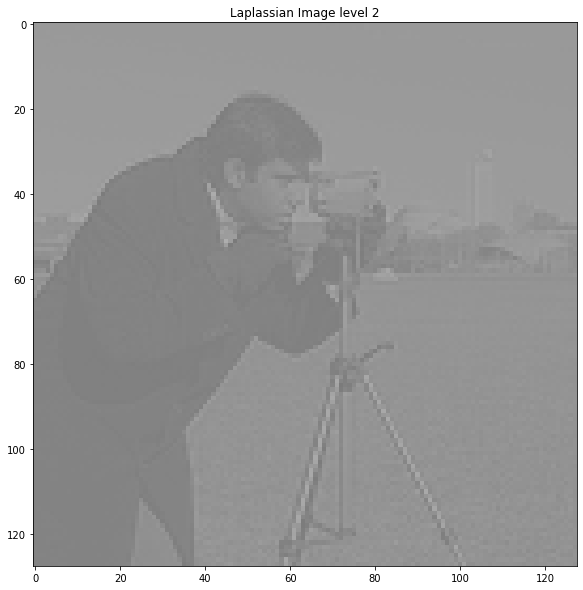

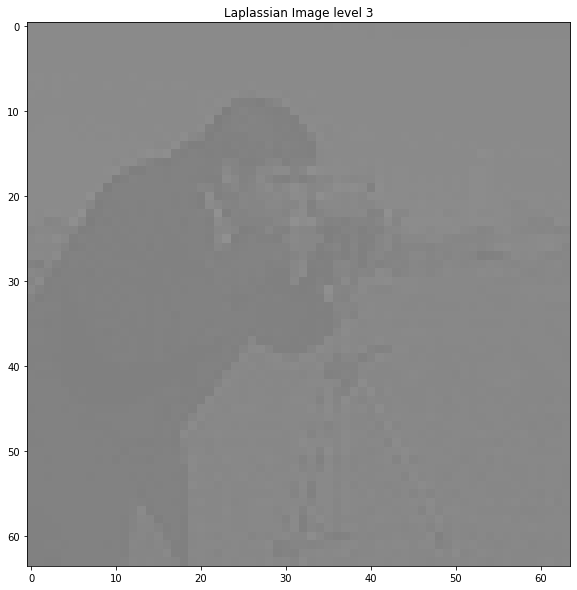

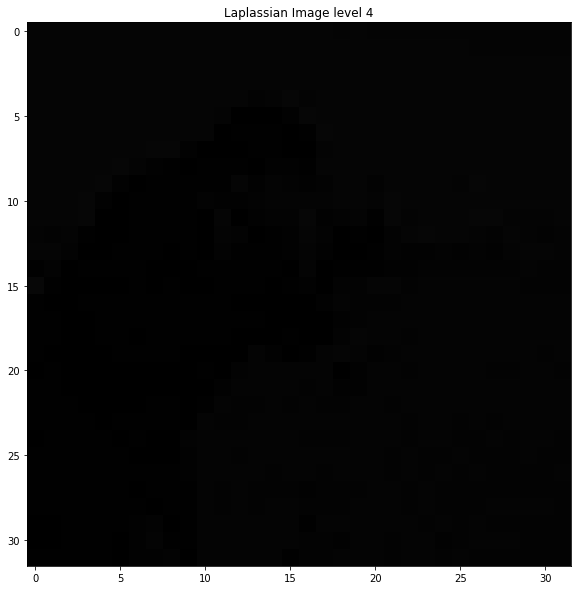

In [102]:
a = 3/8
depth=5

Lena_Lapl = LaplassianPyramid(Lena_RGB,a,depth)
Camera_Lapl = LaplassianPyramid(Camera_RGB,a,depth)


show_Laplassian_image(Camera_Lapl)